### **📊2Cycle**

In [1]:
import pandas as pd

# 데이터 불러오기
pre_c_df = pd.read_csv("./datasets/Concrete Compressive Strength.csv")

In [2]:
# 1Cycle 데이터 전처리
pre_c_df = pre_c_df.drop_duplicates()

<Axes: >

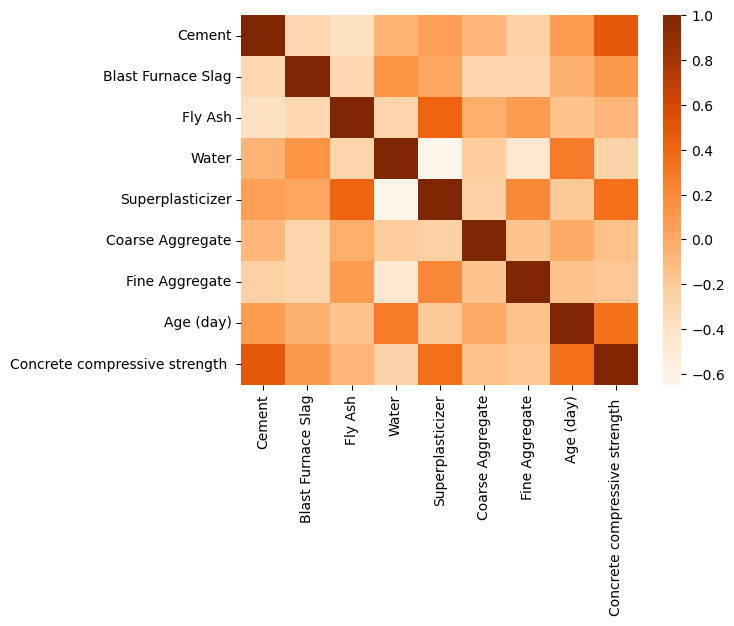

In [3]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(pre_c_df.corr(), cmap='Oranges')

In [4]:
# 표를 통해 상관관계 확인
pre_c_df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age (day),0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
Concrete compressive strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


In [5]:
# 타겟과의 상관관계 확인
pre_c_df.corr()['Concrete compressive strength '].sort_values(ascending=False)[1:]

Cement                0.488283
Superplasticizer      0.344225
Age (day)             0.337371
Blast Furnace Slag    0.103370
Fly Ash              -0.080648
Coarse Aggregate     -0.144710
Fine Aggregate       -0.186457
Water                -0.269606
Name: Concrete compressive strength , dtype: float64

In [6]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 세트 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                       OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength    R-squared (uncentered):                   0.930
Model:                                        OLS   Adj. R-squared (uncentered):              0.930
Method:                             Least Squares   F-statistic:                              1665.
Date:                            Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                                    13:54:34   Log-Likelihood:                         -3764.7
No. Observations:                            1005   AIC:                                      7545.
Df Residuals:                                 997   BIC:                                      7585.
Df Model:                                       8                                                  
Covariance Type:                        nonrobust                                                  


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [8]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,15.155077,Cement
1,3.261879,Blast Furnace Slag
2,4.171453,Fly Ash
3,81.395278,Water
4,5.171809,Superplasticizer
5,84.738626,Coarse Aggregate
6,72.495779,Fine Aggregate
7,1.696228,Age (day)


In [9]:
# Coarse Aggregate 피처 삭제하기
pre_c2_df = pre_c_df.drop(labels=['Coarse Aggregate'], axis=1).reset_index(drop=True)
pre_c2_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,788.9,28,32.768036


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_c2_df.iloc[:, :-1], pre_c2_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [13]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 114.9870, RMSE: 10.7232, MSLE: 0.1051, RMSLE: 0.3241, R2: 0.5490


In [14]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_c2_df.iloc[:, :-1], pre_c2_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 61.1609, RMSE: 7.8205, MSLE: 0.0668, RMSLE: 0.2584, R2: 0.7668


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_c2_df.iloc[:, :-1], pre_c2_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 35.2596, RMSE: 5.9380, MSLE: 0.0449, RMSLE: 0.2118, R2: 0.8617
RandomForestRegressor
MSE: 21.6679, RMSE: 4.6549, MSLE: 0.0234, RMSLE: 0.1530, R2: 0.9150
GradientBoostingRegressor
MSE: 22.3688, RMSE: 4.7296, MSLE: 0.0253, RMSLE: 0.1589, R2: 0.9123
XGBRegressor
MSE: 15.5580, RMSE: 3.9444, MSLE: 0.0183, RMSLE: 0.1353, R2: 0.9390
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 7
[LightGBM] [Info] Start training from score 35.086463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [17]:
# 타겟과의 상관관계 확인
pre_c2_df.corr()['Concrete compressive strength '].sort_values(ascending=False)[1:]

Cement                0.488283
Superplasticizer      0.344225
Age (day)             0.337371
Blast Furnace Slag    0.103370
Fly Ash              -0.080648
Fine Aggregate       -0.186457
Water                -0.269606
Name: Concrete compressive strength , dtype: float64

In [18]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 세트 분리
features, targets = pre_c2_df.iloc[:, :-1], pre_c2_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                       OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength    R-squared (uncentered):                   0.930
Model:                                        OLS   Adj. R-squared (uncentered):              0.929
Method:                             Least Squares   F-statistic:                              1884.
Date:                            Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                                    13:55:14   Log-Likelihood:                         -3769.7
No. Observations:                            1005   AIC:                                      7553.
Df Residuals:                                 998   BIC:                                      7588.
Df Model:                                       7                                                  
Covariance Type:                        nonrobust                                                  


In [19]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,14.143001,Cement
1,3.229439,Blast Furnace Slag
2,3.996955,Fly Ash
3,71.997761,Water
4,5.110824,Superplasticizer
5,47.775228,Fine Aggregate
6,1.696184,Age (day)


In [20]:
# OLS를 살펴봤을때 R2를 유지하면서 다중공선성이 조금 해소된 모습이다
# 중요도가 낮은 피처를 더 제거해본다

In [21]:
# Water, Fly Ash, Fine Aggregate 피처 삭제하기
pre_c3_df = pre_c2_df.drop(labels=['Water', 'Fly Ash', 'Fine Aggregate'], axis=1).reset_index(drop=True)
pre_c3_df

,Cement,Blast Furnace Slag,Superplasticizer,Age (day),Concrete compressive strength
0,540.0,0.0,2.5,28,79.986111
1,540.0,0.0,2.5,28,61.887366
2,332.5,142.5,0.0,270,40.269535
3,332.5,142.5,0.0,365,41.052780
4,198.6,132.4,0.0,360,44.296075
...,...,...,...,...,...
1000,276.4,116.0,8.9,28,44.284354
1001,322.2,0.0,10.4,28,31.178794
1002,148.5,139.4,6.1,28,23.696601
1003,159.1,186.7,11.3,28,32.768036


In [22]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_c3_df.iloc[:, :-1], pre_c3_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [23]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 68.3309, RMSE: 8.2663, MSLE: 0.0860, RMSLE: 0.2933, R2: 0.7395


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_c3_df.iloc[:, :-1], pre_c3_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 46.7164, RMSE: 6.8349, MSLE: 0.0419, RMSLE: 0.2047, R2: 0.8168
RandomForestRegressor
MSE: 25.8707, RMSE: 5.0863, MSLE: 0.0294, RMSLE: 0.1713, R2: 0.8985
GradientBoostingRegressor
MSE: 28.3982, RMSE: 5.3290, MSLE: 0.0343, RMSLE: 0.1852, R2: 0.8886
XGBRegressor
MSE: 23.6483, RMSE: 4.8630, MSLE: 0.0253, RMSLE: 0.1590, R2: 0.9073
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 4
[LightGBM] [Info] Start training from score 35.086463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [25]:
# 타겟과의 상관관계 확인
pre_c3_df.corr()['Concrete compressive strength '].sort_values(ascending=False)[1:]

Cement                0.488283
Superplasticizer      0.344225
Age (day)             0.337371
Blast Furnace Slag    0.103370
Name: Concrete compressive strength , dtype: float64

<Axes: >

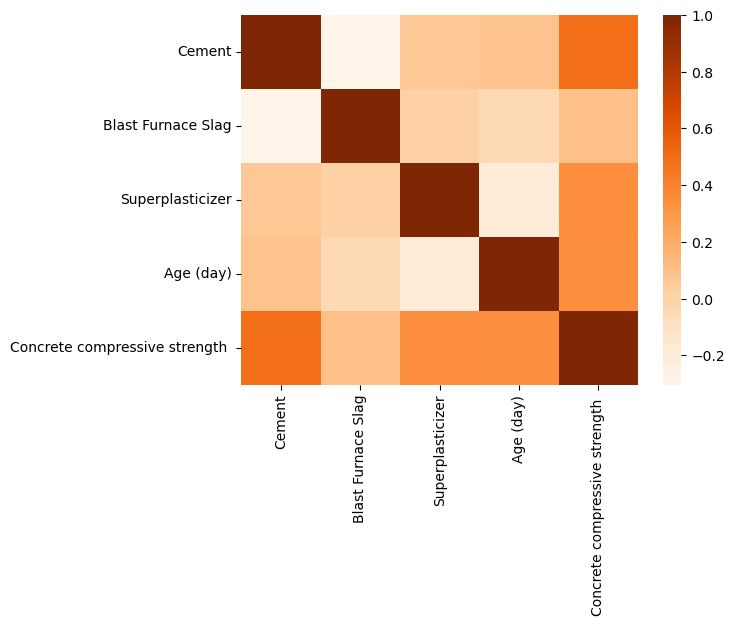

In [26]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(pre_c3_df.corr(), cmap='Oranges')

In [27]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 세트 분리
features, targets = pre_c3_df.iloc[:, :-1], pre_c3_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                       OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength    R-squared (uncentered):                   0.919
Model:                                        OLS   Adj. R-squared (uncentered):              0.918
Method:                             Least Squares   F-statistic:                              2822.
Date:                            Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                                    13:55:17   Log-Likelihood:                         -3843.3
No. Observations:                            1005   AIC:                                      7695.
Df Residuals:                                1001   BIC:                                      7714.
Df Model:                                       4                                                  
Covariance Type:                        nonrobust                                                  


In [28]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,2.707993,Cement
1,1.431109,Blast Furnace Slag
2,1.990865,Superplasticizer
3,1.531228,Age (day)


### **📝2Cycle 결과**
>   
>   

In [29]:
# R2의 성능 대비 다중공선성이 어느정도 해소된 모습이다
# 트리 결과 XGBRegresso 모델의 성능이 제일 좋으므로, XGBRegresso의 파라미터를 조절하여 성능을 올려본다